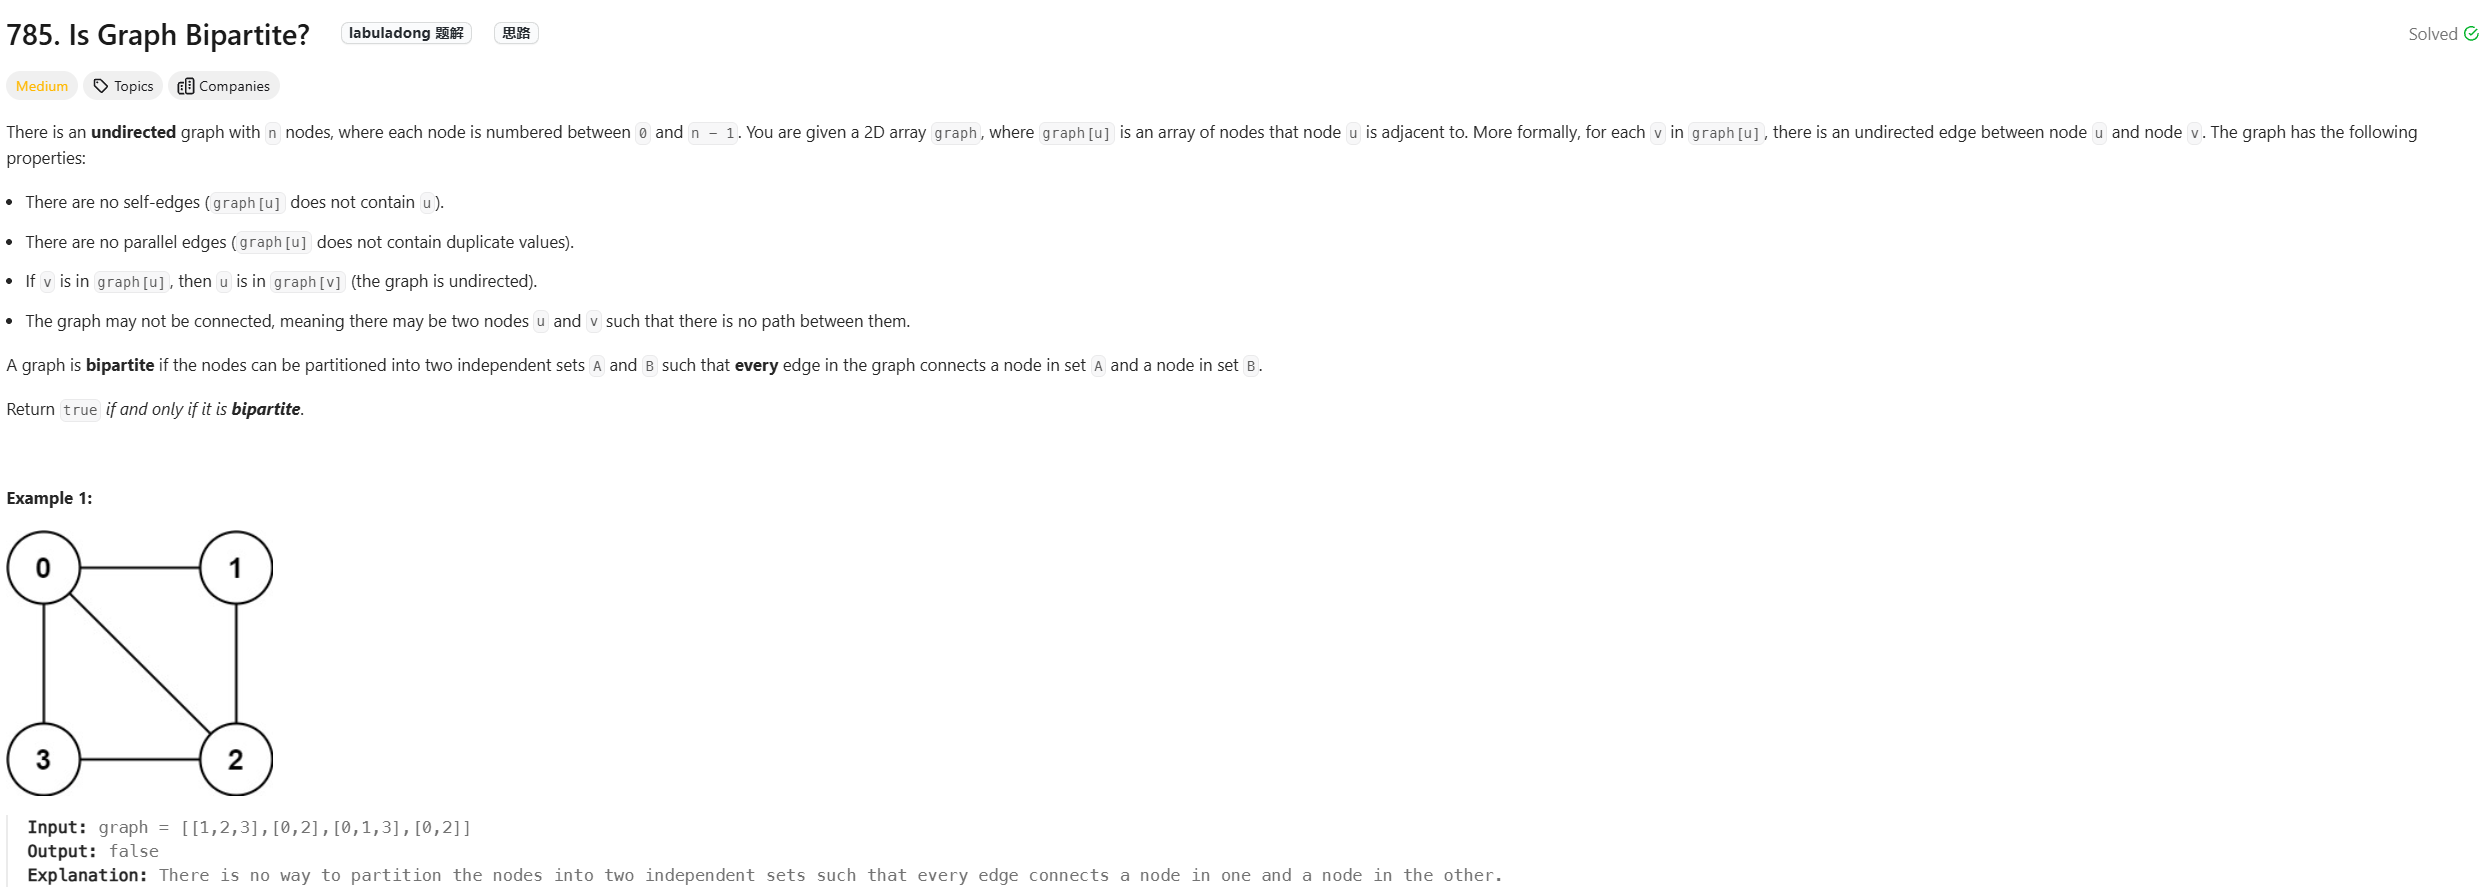

In [ ]:
class Solution:
    def __init__(self):
        # Initialize attributes to track the bipartite status and node information
        self.ans = True          # Flag to indicate if the graph is bipartite
        self.colors = None       # Stores the color of each node (True or False)
        self.visited = None      # Tracks whether each node has been visited

    def isBipartite(self, graph: List[List[int]]) -> bool:
        n = len(graph)  # Number of nodes in the graph

        # Initialize colors and visited arrays
        self.colors = [False] * n  # Default color is False
        self.visited = [False] * n # No node has been visited at the start

        # Traverse all nodes to ensure disconnected components are checked
        for v in range(n):
            # If the current node has not been visited, perform DFS from this node
            if not self.visited[v]:
                self.bfs(graph, v)

        # Return whether the graph is bipartite
        return self.ans

    def bfs(self, graph: List[List[int]], v: int):

        q = collections.deque()
        q.append(v)

        while q and self.ans:
            cur = q.popleft()
            self.visited[cur] = True

            for neighbor in graph[cur]:
                #if neighbor is visited
                if self.visited[neighbor]:
                    if self.colors[neighbor] == self.colors[cur]:
                        self.ans = False
                else:
                    self.colors[neighbor] = not self.colors[cur]
                    q.append(neighbor)
        

In [ ]:
class Solution:
    def __init__(self):
        self.solvable = True
        self.colors = None
        self.visited = None

    def isBipartite(self, graph: List[List[int]]) -> bool:
        # Initalized variables
        n = len(graph)
        self.colors = [False] * n
        self.visited = [False] * n

        # Use for loop to serach graph, avoid isolated vertex
        for i in range(n):
            self.dfs(graph, i)
            
        # return solvable as ans
        return self.solvable

    def dfs(self, graph: List[List[int]], v: int):

        # 1.Check that if the color problem is already not solvable
        if not self.solvable:
            return
        # 2.Check that if current vertex is already visietd
        if self.visited[v]:
            return

        # 3. Mark v as visited
        self.visited[v] = True

        # 4. Obtain v's neighbors
        neighbors = graph[v]
        for neighbor in neighbors:
            # 4.1 If neighbor has been visited, compare its color and vertex
            if self.visited[neighbor]:
                # Same color, not solvable
                if self.colors[neighbor] == self.colors[v]:
                    self.solvable = False
                    return
                # Different color, keep check other neighbors
                else:
                    continue
            # 4.2 Neighbor has not been visited, mark its color different with vertex
            # also perform dfs on this neighbor
            else:
                self.colors[neighbor] = not self.colors[v]
                self.dfs(graph, neighbor)

        # 5. Finish checking of current vertex's neighbors
        return
